# 读取数据，图片类型

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from numpy import *  
import time  
import matplotlib.pyplot as plt

n_colors = 64
n_clusters=n_colors
# Load the Summer Palace photo
china = load_sample_image("china.jpg")
print(china.shape)

china = np.array(china, dtype=np.float64) / 255
w, h, d = original_shape = tuple(china.shape)
image_array = np.reshape(china, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]

(427, 640, 3)


C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


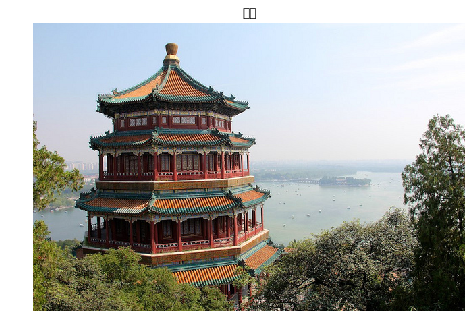

In [20]:
plt.figure(4)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('原图')
plt.imshow(china)

# 基本函数的构造
# kmeans

In [10]:
# k-means cluster 
#dataSet为一个矩阵
#k为将dataSet矩阵中的样本分成k个类 
def kmeans(dataSet, k):  
	numSamples = dataSet.shape[0]  #读取矩阵dataSet的第一维度的长度,即获得有多少个样本数据
    # first column stores which cluster this sample belongs to,  
    # second column stores the error between this sample and its centroid  
	clusterAssment = mat(zeros((numSamples, 2)))  #得到一个N*2的零矩阵
	clusterChanged = True  
  
    ## step 1: init centroids  
	centroids = initCentroids(dataSet, k)  #在样本集中随机选取k个样本点作为初始质心
  
	while clusterChanged:  
		clusterChanged = False  
        ## for each sample  
		for i in range(numSamples):  #range
			minDist  = 100000.0  
			minIndex = 0  
            ## for each centroid  
            ## step 2: find the centroid who is closest  
			#计算每个样本点与质点之间的距离，将其归内到距离最小的那一簇
			for j in range(k):  
				distance = euclDistance(centroids[j, :], dataSet[i, :])  
				if distance < minDist:  
					minDist  = distance  
					minIndex = j  
              
            ## step 3: update its cluster 
			#k个簇里面与第i个样本距离最小的的标号和距离保存在clusterAssment中
			#若所有的样本不在变化，则退出while循环
			if clusterAssment[i, 0] != minIndex:  
				clusterChanged = True  
				clusterAssment[i, :] = minIndex, minDist**2  #两个**表示的是minDist的平方
  
        ## step 4: update centroids  
		for j in range(k):  
			#clusterAssment[:,0].A==j是找出矩阵clusterAssment中第一列元素中等于j的行的下标，返回的是一个以array的列表，第一个array为等于j的下标
			pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]] #将dataSet矩阵中相对应的样本提取出来 
			centroids[j, :] = mean(pointsInCluster, axis = 0)  #计算标注为j的所有样本的平均值
  
	print ('Congratulations, cluster complete!')  
	return centroids, clusterAssment  
  
# calculate Euclidean distance  
def euclDistance(vector1, vector2):  
	return sqrt(sum(power(vector2 - vector1, 2)))  #求这两个矩阵的距离，vector1、2均为矩阵

def initCentroids(dataSet, k):  
	numSamples, dim = dataSet.shape   #矩阵的行数、列数 
	centroids = zeros((k, dim))  		#感觉要不要你都可以
	for i in range(k):  
		index = int(random.uniform(0, numSamples))  #随机产生一个浮点数，然后将其转化为int型
		centroids[i, :] = dataSet[index, :]  
	return centroids  


# 原图各个像素的分类

In [3]:
def predict_data(dataSet, k,centroids, clusterAssment):
    numSamples = dataSet.shape[0]
    label=[]
    predict_Assment = mat(zeros((numSamples, 2)))
    
    clusterChanged = True
    for i in range(numSamples):
        minDist  = 100000.0 
        minIndex = 0
        for j in range(k):  
            distance = euclDistance(centroids[j, :], dataSet[i, :])
            if distance < minDist:
                minDist  = distance
                minIndex = j
            if predict_Assment[i, 0] != minIndex:
                clusterChanged = True
                predict_Assment[i, :] = minIndex, minDist**2 
                
                
    return predict_Assment

# 重构图片

In [4]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            #labelIndex,dist= labels[i, :]
            image[i][j] = codebook[int(label[label_idx, :][0,:1])]
            label_idx += 1
    return image


# 图片数据量非常大。为了更快计算。我是抽样其中部分数据。虽然图像有损失，但是效果依然不错
## 聚类的点数是自定义。这里选择3，30，60

In [11]:
centroids, clusterAssment=kmeans(image_array_sample, 3)

Congratulations, cluster complete!


In [12]:
label=predict_data(image_array,3,centroids, clusterAssment)
image=recreate_image(centroids,label,w,h)

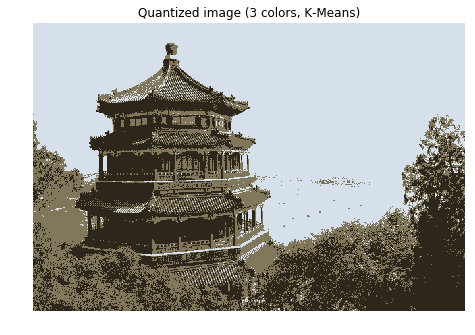

In [13]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (3 colors, K-Means)')
plt.imshow(image)

In [17]:
centroids, clusterAssment=kmeans(image_array_sample, 30)

Congratulations, cluster complete!


In [18]:
label=predict_data(image_array,30,centroids, clusterAssment)
image=recreate_image(centroids,label,w,h)

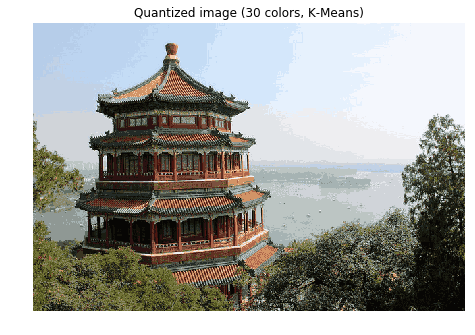

In [19]:
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (30 colors, K-Means)')
plt.imshow(image)

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Congratulations, cluster complete!


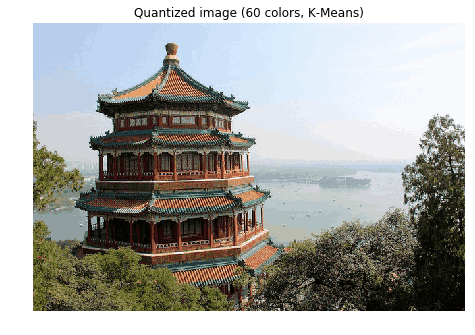

In [21]:
n_color=60
centroids, clusterAssment=kmeans(image_array_sample, n_color)
label=predict_data(image_array,n_color,centroids, clusterAssment)
image=recreate_image(centroids,label,w,h)
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (60 colors, K-Means)')
plt.imshow(image)